In [1]:
import pandas as pd
df = pd.read_csv('./data/user_activity_data.csv')

# Inspect the data
print(df.head())

                        _id                    userId  \
0  672ba1f948ab89a79881e0c8  67189a704f4eed52a1cfb7ae   
1  672ba1f948ab89a79881e0c9  67189a704f4eed52a1cfb7ae   
2  672ba1f948ab89a79881e0ca  67189a704f4eed52a1cfb7ae   
3  672ba1f948ab89a79881e0cb  67189a704f4eed52a1cfb7ae   
4  672ba1f948ab89a79881e0cc  67189a704f4eed52a1cfb7ae   

                      date  waterIntake  calorieIntake  sleepDuration  \
0  2023-11-06 17:06:01.440         4394           2417              6   
1  2023-11-07 17:06:01.440         3442           3773              5   
2  2023-11-08 17:06:01.440         2320           2718              5   
3  2023-11-09 17:06:01.440         1916           1760              7   
4  2023-11-10 17:06:01.440         3487           1833              6   

   dailySteps fastingOption  isFastingAdhered  fastingDeviation  \
0        8313          16:8             False                 0   
1       12946          16:8             False                 0   
2        7137    

In [2]:
df.columns

Index(['_id', 'userId', 'date', 'waterIntake', 'calorieIntake',
       'sleepDuration', 'dailySteps', 'fastingOption', 'isFastingAdhered',
       'fastingDeviation', 'createdAt', 'fastingStartTime', 'fastingEndTime',
       '__v', 'updatedAt'],
      dtype='object')

In [3]:
columns_to_keep = ['userId', 'date', 'waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']
df_cleaned = df[columns_to_keep]

# Check the first few rows to ensure data is cleaned correctly
print(df_cleaned.head())

                     userId                     date  waterIntake  \
0  67189a704f4eed52a1cfb7ae  2023-11-06 17:06:01.440         4394   
1  67189a704f4eed52a1cfb7ae  2023-11-07 17:06:01.440         3442   
2  67189a704f4eed52a1cfb7ae  2023-11-08 17:06:01.440         2320   
3  67189a704f4eed52a1cfb7ae  2023-11-09 17:06:01.440         1916   
4  67189a704f4eed52a1cfb7ae  2023-11-10 17:06:01.440         3487   

   calorieIntake  sleepDuration  dailySteps  
0           2417              6        8313  
1           3773              5       12946  
2           2718              5        7137  
3           1760              7       10632  
4           1833              6       13041  


In [4]:
# df_cleaned.to_csv('./data/user_activity_cleaned.csv', index=False)

print("Data has been successfully cleaned and saved to 'user_activity_cleaned.csv'")

Data has been successfully cleaned and saved to 'user_activity_cleaned.csv'


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_csv('./data/user_activity_cleaned.csv')

df['date'] = pd.to_datetime(df['date'])

print(df.isnull().sum())

df = df.dropna()


df['day_of_week'] = df['date'].dt.dayofweek  

df = df.drop('date', axis=1)

scaler = MinMaxScaler()
df[['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']] = scaler.fit_transform(
    df[['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']]
)

print(df.head())

# Save the preprocessed data (optional)
# df.to_csv('./data/user_activity_preprocessed.csv', index=False)

userId           0
date             0
waterIntake      0
calorieIntake    0
sleepDuration    0
dailySteps       0
dtype: int64
                     userId  waterIntake  calorieIntake  sleepDuration  \
0  67189a704f4eed52a1cfb7ae     0.883216       0.605158       0.857143   
1  67189a704f4eed52a1cfb7ae     0.691859       0.944667       0.714286   
2  67189a704f4eed52a1cfb7ae     0.466332       0.680521       0.714286   
3  67189a704f4eed52a1cfb7ae     0.385126       0.440661       1.000000   
4  67189a704f4eed52a1cfb7ae     0.700905       0.458938       0.857143   

   dailySteps  day_of_week  
0    0.593786            0  
1    0.924714            1  
2    0.509786            2  
3    0.759429            3  
4    0.931500            4  


In [6]:
df.describe()

,waterIntake,calorieIntake,sleepDuration,dailySteps,day_of_week
count,383.000000,383.000000,383.000000,383.000000,383.000000
mean,0.564858,0.655004,0.826184,0.556291,2.892950
std,0.251844,0.223402,0.197891,0.247578,2.030275
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.362111,0.495869,0.714286,0.385929,1.000000
50%,0.562010,0.658237,0.857143,0.563143,3.000000
75%,0.790151,0.842013,1.000000,0.750964,5.000000
max,1.000000,1.000000,1.000000,1.000000,6.000000


In [7]:
from sklearn.ensemble import IsolationForest
import pandas as pd

df = pd.read_csv('./data/user_activity_preprocessed.csv')

X = df[['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']]

contamination_level = 0.05
model = IsolationForest(contamination=contamination_level, random_state=42)
model.fit(X)


anomaly_scores = model.decision_function(X)  

threshold = np.percentile(anomaly_scores, 100 * contamination_level)

predicted_anomalies = anomaly_scores < threshold

detected_anomalies_ratio = np.mean(predicted_anomalies)

print(f"Expected anomaly ratio (contamination level): {contamination_level}")
print(f"Detected anomaly ratio: {detected_anomalies_ratio}")
df['anomaly'] = model.predict(X)


anomalous_index = df[df['anomaly'] == -1].index[2]  
print("Third anomaly index:", anomalous_index)




Expected anomaly ratio (contamination level): 0.05
Detected anomaly ratio: 0.05221932114882506
Third anomaly index: 148


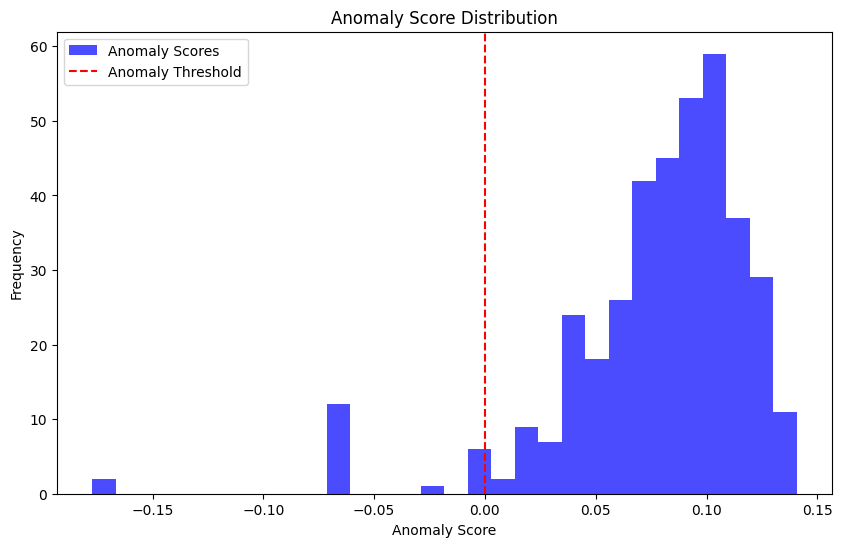

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=30, color='blue', alpha=0.7, label="Anomaly Scores")
plt.axvline(threshold, color='red', linestyle='--', label="Anomaly Threshold")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Anomaly Score Distribution")
plt.legend()
plt.show()


userId           67189a704f4eed52a1cfb7ae
waterIntake                      0.704925
calorieIntake                    0.999249
sleepDuration                    0.714286
dailySteps                       0.991071
day_of_week                             1
anomaly                                -1
Name: 148, dtype: object


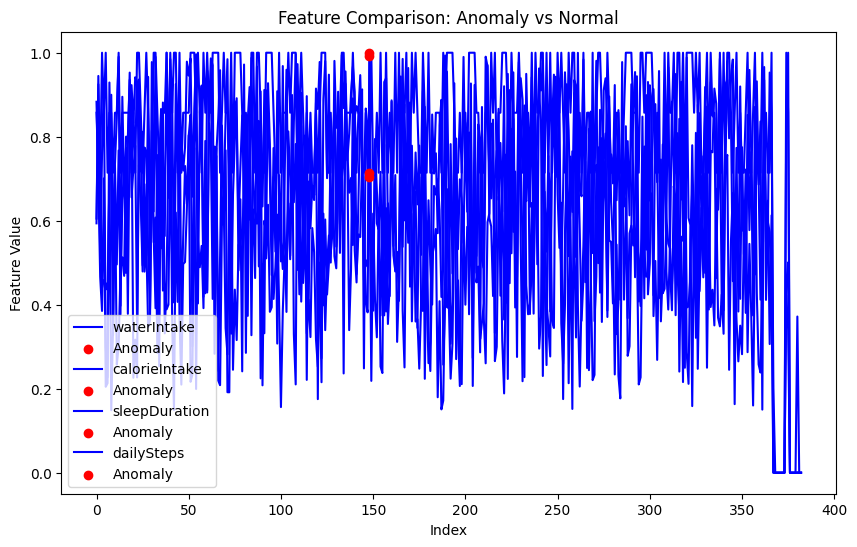

In [9]:
import matplotlib.pyplot as plt
anomalous_data = df.iloc[anomalous_index]
print(anomalous_data)
# Plot the features for the first anomaly
plt.figure(figsize=(10, 6))

# Plot each feature for the anomalous data point
features = ['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']
for feature in features:
    plt.plot(df[feature], label=feature, color='blue')
    plt.scatter(anomalous_index, anomalous_data[feature], color='red', label='Anomaly', zorder=5)

plt.legend()
plt.title('Feature Comparison: Anomaly vs Normal')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.show()



In [10]:
import shap

explainer = shap.Explainer(model, X)

shap_values_for_anomaly = explainer.shap_values(X.iloc[anomalous_index])


if isinstance(shap_values_for_anomaly, list):
    shap_values_for_anomaly = shap_values_for_anomaly[0]

print("SHAP Values for Anomaly:", shap_values_for_anomaly)


feature_names = X.columns 

print(feature_names)

shap_values_df = pd.DataFrame(
    shap_values_for_anomaly.reshape(1, -1), columns=feature_names
)
print(shap_values_df)



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP Values for Anomaly: [ 0.19333295 -1.08755606 -0.33368519 -1.45285712]
Index(['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps'], dtype='object')
   waterIntake  calorieIntake  sleepDuration  dailySteps
0     0.193333      -1.087556      -0.333685   -1.452857


In [11]:
# import joblib
# joblib.dump(model, "./data/isolation_forest_model.pkl")
# joblib.dump(explainer, "./data/shap_explainer.pkl")

In [12]:
# joblib.dump(scaler, './data/scaler.pkl')

In [13]:
import re


df = pd.read_excel("./data/Fitness Youtube data.xlsx")
AllBlancTV = pd.read_csv("./data/AllBlancTV.csv", index_col = "Unnamed: 0")
EmiWong =  pd.read_csv("./data/EmiWong.csv", index_col = "Unnamed: 0")
ChloeTing = pd.read_csv("./data/ChloeTing.csv", index_col = "Unnamed: 0")
JoeWicks = pd.read_csv("./data/JoeWicks.csv", index_col = "Unnamed: 0")
growingannanas = pd.read_csv("./data/growingannanas.csv", index_col = "Unnamed: 0")
Pamela = pd.read_csv("./data/Pamela.csv", index_col = "Unnamed: 0")
Heather = pd.read_csv("./data/Heather.csv", index_col = "Unnamed: 0")
MadFit = pd.read_csv("./data/MadFit.csv", index_col = "Unnamed: 0")



# Function to remove ordinal suffixes
def remove_ordinal_suffixes(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Apply the function to the 'created' column
df['created'] = df['created'].apply(remove_ordinal_suffixes)

workouts = pd.concat([AllBlancTV,EmiWong, ChloeTing, JoeWicks, growingannanas, Pamela, Heather, MadFit])
#drop columns with limited/ no data
workouts.drop(["caption","favouriteCount"], axis = 1, inplace = True)

# seperate published at variable which includes date and time to two variables
workouts[["Publish_date", "Publish_time"]] = workouts["publishedAt"].str.split(" ", expand = True)

# reformat date variable to datetime 
workouts["Publish_date"] = pd.to_datetime(workouts["Publish_date"], format = "%Y-%m-%d")

# add new column for when the data was complied
workouts["creation"] = pd.to_datetime('2022-08-08')

# calculate when the videos were published relative to the day when the data was complied
workouts["days"] = (workouts["creation"]-workouts["Publish_date"]).dt.days

# drop published at variable
workouts.drop(["publishedAt" ], axis = 1, inplace = True)

# Social Blade data - 
# convert created data field to datatime format
df['created'] = pd.to_datetime(df['created'], format='%b %d, %Y')

In [14]:
df.head()

,Name,Youtube channel,chanel id,Subs (million),Video views,Country,grade,channel type,created
0,AllblancTV,https://www.youtube.com/c/AllblancTV,UCq7bR6RxqqOx8cptc1-0AVQ,1.90,220582406,KR,B+,Sports,2018-01-17
1,ChloeTing,https://www.youtube.com/c/ChloeTing,UCCgLoMYIyP0U56dEhEL1wXQ,24.00,2734736094,AU,B+,Howto,2011-08-17
2,growingannanas,https://www.youtube.com/c/growingannanas,UCsLF0qPTpkYKq81HsjgzhwQ,1.88,355922511,DE,B+,Sports,2017-01-20
3,TheBodyCoachTV/JoeWicks,https://www.youtube.com/c/TheBodyCoachTV,UCAxW1XT0iEJo0TYlRfn6rYQ,2.81,324204037,GB,B+,Sports,2011-08-12
4,Pamela Reif,https://www.youtube.com/c/PamelaRf1,UChVRfsT_ASBZk10o0An7Ucg,9.01,1505679213,DE,B+,Sports,2013-09-16


In [15]:
# workouts.head()
# drop videos where likes is null
workouts.drop(workouts[workouts["likeCount"].isnull()].index, inplace = True)

# drop videos marked as a short or is less than 60s 
shorts = workouts[workouts["title"].str.contains("#shorts")].index
workouts.drop(shorts, axis =0, inplace = True)

shorts_1 = workouts[workouts["durationSecs"]<=60].index
workouts.drop(shorts_1, axis =0, inplace = True)

In [16]:
BodyCoach_outliers = workouts[(workouts["channelTitle"]=="The Body Coach TV") & (workouts["durationSecs"]> 2680)]["title"]
BodyCoach_outliers.reset_index().set_index("index")

,title
index,
259,PE With Joe | Monday 1st June
386,The Body Coach: UK Schools HIIT Tour | FULL DO...
489,The world's first HIIT in a football stadium #...
614,Lean In 15 Closing Book Tour | Live Q&A | London


In [45]:
workouts.drop([386, 614], inplace = True)
# This step is repeated for the the remaining channels and the following videos can be dropped

workouts.drop([429, 69, 383, 5, 14, 167, 168, 162, 311, 83, 136, 196, 95, 108], inplace = True)

# as the string live in videos indicated that it could be also outliers, this is checked in a similar manner and one video is dropped
workouts[workouts["title"].str.contains("LIVE")]
workouts.drop([124], inplace = True)
workouts.reset_index(drop=True, inplace = True)

print( "Number of entries/videos:", workouts.shape[0])


Number of entries/videos: 2515


,video_id,channelTitle,title,description,tags,viewCount,likeCount,commentCount,duration,definition,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time,creation,days
0,wJhYFxMmB5E,Allblanc TV,BURN FAT WORKOUT AT HOME (No Equipment) l 체지방 ...,Follow along this Fullbody Workout at home. Yo...,"['allblanc tv', '올블랑tv', 'no gym workout', 'fa...",9913.0,737.0,46.0,PT12M11S,hd,Sunday,731.0,21,2022-08-07,14:08:50+00:00,2022-08-08,1
1,ZIuzJ4tzX5c,Allblanc TV,"Daily Morning Stretch - tight muscle, flexibil...",▶️Allblanc Free Workout Program : https://bit....,NaN,20218.0,1242.0,48.0,PT10M20S,hd,Sunday,620.0,0,2022-07-24,13:47:28+00:00,2022-08-08,15
2,W2fS4TqeWCc,Allblanc TV,헤어질 결심 : 복부지방 (7일 복근 챌린지) | Say Good-Bye to Be...,드디어 7일 복근 챌린지 마지막 날입니다!\n끝까지 함께 하신 분들 수고 많으셨어요...,"['올블랑', 'workout at home', 'sixpack workout', ...",20705.0,915.0,62.0,PT20M49S,hd,Sunday,1249.0,20,2022-07-10,13:00:13+00:00,2022-08-08,29
3,m9nTKybf468,Allblanc TV,이 도시의 주인공은 바로 우리야! 5분 스탠딩 복근 타바타 l We Rock The...,"안녕하세요, 올벤져스 여러분!\n오늘은 서서 따라할 수 있는 5분 복근 타바타 운동...","['standing abs workout', '11자 복근 라인 만들기', '올블랑...",34753.0,1309.0,41.0,PT5M14S,hd,Sunday,314.0,15,2022-05-29,12:22:46+00:00,2022-08-08,71
4,gpAbA1IKv4c,Allblanc TV,OFFICE ABS WORKOUT(REST ROOM) 3m | 사무실 양치하며 3분...,운동 할 시간 없다는게 말이 안되지요 !ㅎㅎ\nThere's no excuse 'y...,"['allblanc tv', 'office workout', '오피스 운동', '올...",15959.0,623.0,57.0,PT4M40S,hd,Monday,280.0,13,2022-04-04,10:58:21+00:00,2022-08-08,126


In [18]:
processed = workouts[(workouts['commentCount']>0)& (workouts['likeCount']>0) & (workouts['viewCount']>0)]
droppped_videos = workouts[~workouts.index.isin(processed.index)]
print("Revised dataset size:", processed.shape[0])

Revised dataset size: 2485


In [19]:
# processed.head()

# unique channelTitle
# processed["channelTitle"].unique()

# download the processed data as yt
# processed.to_csv("./data/yt.csv", index = False)

In [20]:
new_df  = pd.read_csv("./data/yt.csv")
new_df.head()

,video_id,channelTitle,title,description,tags,viewCount,likeCount,commentCount,duration,definition,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time,creation,days
0,wJhYFxMmB5E,Allblanc TV,BURN FAT WORKOUT AT HOME (No Equipment) l 체지방 ...,Follow along this Fullbody Workout at home. Yo...,"['allblanc tv', '올블랑tv', 'no gym workout', 'fa...",9913.0,737.0,46.0,PT12M11S,hd,Sunday,731.0,21,2022-08-07,14:08:50+00:00,2022-08-08,1
1,ZIuzJ4tzX5c,Allblanc TV,"Daily Morning Stretch - tight muscle, flexibil...",▶️Allblanc Free Workout Program : https://bit....,NaN,20218.0,1242.0,48.0,PT10M20S,hd,Sunday,620.0,0,2022-07-24,13:47:28+00:00,2022-08-08,15
2,W2fS4TqeWCc,Allblanc TV,헤어질 결심 : 복부지방 (7일 복근 챌린지) | Say Good-Bye to Be...,드디어 7일 복근 챌린지 마지막 날입니다!\n끝까지 함께 하신 분들 수고 많으셨어요...,"['올블랑', 'workout at home', 'sixpack workout', ...",20705.0,915.0,62.0,PT20M49S,hd,Sunday,1249.0,20,2022-07-10,13:00:13+00:00,2022-08-08,29
3,m9nTKybf468,Allblanc TV,이 도시의 주인공은 바로 우리야! 5분 스탠딩 복근 타바타 l We Rock The...,"안녕하세요, 올벤져스 여러분!\n오늘은 서서 따라할 수 있는 5분 복근 타바타 운동...","['standing abs workout', '11자 복근 라인 만들기', '올블랑...",34753.0,1309.0,41.0,PT5M14S,hd,Sunday,314.0,15,2022-05-29,12:22:46+00:00,2022-08-08,71
4,gpAbA1IKv4c,Allblanc TV,OFFICE ABS WORKOUT(REST ROOM) 3m | 사무실 양치하며 3분...,운동 할 시간 없다는게 말이 안되지요 !ㅎㅎ\nThere's no excuse 'y...,"['allblanc tv', 'office workout', '오피스 운동', '올...",15959.0,623.0,57.0,PT4M40S,hd,Monday,280.0,13,2022-04-04,10:58:21+00:00,2022-08-08,126


In [21]:
new_df.dtypes

video_id             object
channelTitle         object
title                object
description          object
tags                 object
viewCount           float64
likeCount           float64
commentCount        float64
duration             object
definition           object
pushblishDayName     object
durationSecs        float64
tagCount              int64
Publish_date         object
Publish_time         object
creation             object
days                  int64
dtype: object

In [22]:
new_df.fillna(0, inplace=True)

# Encode categorical data as needed
new_df['definition'] = new_df['definition'].astype('category').cat.codes
new_df['pushblishDayName'] = new_df['pushblishDayName'].astype('category').cat.codes

In [23]:
from sklearn.decomposition import TruncatedSVD

from sklearn.decomposition import PCA
# Example User-Video matrix
# For demonstration, we’re creating a pseudo user-video matrix based on `viewCount`
video_matrix = new_df.pivot_table(index='video_id', columns='channelTitle', values='viewCount').fillna(0)

video_matrix.fillna(0, inplace=True)

# Adjust n_components to be smaller than the minimum dimension of video_matrix
n_components = min(50, video_matrix.shape[1] - 1)

# Check if video_matrix is sparse
if (video_matrix == 0).sum().sum() > (0.5 * video_matrix.size):
    # Use SVD if the matrix is sparse
    svd = TruncatedSVD(n_components=n_components)
    video_matrix_svd = svd.fit_transform(video_matrix)
else:
    # Use PCA if the matrix is dense
    pca = PCA(n_components=n_components)
    video_matrix_svd = pca.fit_transform(video_matrix)

# Store SVD or PCA results for recommendations
video_matrix_recommend = pd.DataFrame(video_matrix_svd, index=video_matrix.index)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


new_df['tags'] = new_df['tags'].fillna('').astype(str)

# Apply TF-IDF on the 'tags' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(new_df['tags'])

# Numeric-based features
numeric_features = new_df[['viewCount', 'likeCount', 'durationSecs', 'tagCount']]
numeric_features = (numeric_features - numeric_features.mean()) / numeric_features.std()

# Combine all features into a single matrix
from scipy.sparse import hstack
combined_features = hstack([tfidf_matrix, numeric_features])

# Cosine similarity based on combined features
cosine_sim = cosine_similarity(combined_features, combined_features)

In [25]:
def hybrid_recommend(video_id, top_n=5):
    # Collaborative filtering recommendations
    if video_id in video_matrix_recommend.index:
        video_idx = video_matrix_recommend.index.get_loc(video_id)
        similar_videos_cf = np.argsort(-cosine_sim[video_idx])[:top_n]
    
    # Content-based recommendations
    video_idx_cb = new_df[new_df['video_id'] == video_id].index[0]
    similar_videos_cb = np.argsort(-cosine_sim[video_idx_cb])[:top_n]

    # Combine results
    recommended_videos = list(set(similar_videos_cf) | set(similar_videos_cb))
    return new_df.iloc[recommended_videos]

In [26]:
recommended_videos = hybrid_recommend(video_id='wJhYFxMmB5E')
print(recommended_videos[['title', 'viewCount', 'likeCount']])

                                                  title  viewCount  likeCount
0     BURN FAT WORKOUT AT HOME (No Equipment) l 체지방 ...     9913.0      737.0
2465  20 MIN FULL BODY WORKOUT | At Home & Equipment...   245585.0     5143.0
67    Perfect Home Fullbody Workout for Fat-burning ...   175477.0     3924.0
2436  20 MIN FULL BODY WORKOUT (At Home & Equipment ...   486071.0    11664.0
2149  20 min FULL BODY HIIT WORKOUT with Minimal Equ...   647838.0    17549.0
2407  20 MIN FULL BODY WORKOUT At Home & Equipment F...   185919.0     5531.0
39    Do This Everyday To Burn Fat Fast  (No Gym Ful...   110050.0     3515.0
2348                 20 MIN FULL BODY WORKOUT (At Home)   395158.0     9171.0
118   Quick and Effective FAT BLAST (ft. 5 min Full ...    94049.0     2782.0
28    하루 10분! 빠르게 살 빠지는 전신 운동 l 홈트레이닝 l 10 MIN FULL ...   310734.0     5402.0


In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_recommendation_system(video_id, top_n=5):
    # Get recommended videos
    recommended_videos = hybrid_recommend(video_id, top_n)
    
    # Prepare actual and predicted values for evaluation
    actual_view_counts = new_df[new_df['video_id'] == video_id]['viewCount'].values
    predicted_view_counts = recommended_videos['viewCount'].values[:len(actual_view_counts)]

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(actual_view_counts, predicted_view_counts)
    
    # Calculate Mean Average Precision (MAP)
    relevant = (recommended_videos['likeCount'].values > 0).astype(int)
    precision_at_k = np.cumsum(relevant) / (np.arange(len(relevant)) + 1)
    average_precision = np.sum(precision_at_k * relevant) / sum(relevant) if sum(relevant) else 0
    map_score = average_precision

    return mse, map_score

# Evaluate the system for a specific video ID
mse, map_score = evaluate_recommendation_system(video_id='wJhYFxMmB5E')
print(f"MSE: {mse}")
print(f"MAP: {map_score}")


MSE: 0.0
MAP: 1.0


In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Load and preprocess data
def load_data(filepath):
    df = pd.read_csv(filepath)
    df.fillna(0, inplace=True)
    df['definition'] = df['definition'].astype('category').cat.codes
    df['pushblishDayName'] = df['pushblishDayName'].astype('category').cat.codes
    return df

# Generate User-Video matrix and apply dimensionality reduction
def create_video_matrix(df):
    video_matrix = df.pivot_table(index='video_id', columns='channelTitle', values='viewCount').fillna(0)
    n_components = min(50, video_matrix.shape[1] - 1)
    
    if (video_matrix == 0).sum().sum() > (0.5 * video_matrix.size):
        svd = TruncatedSVD(n_components=n_components)
        reduced_matrix = svd.fit_transform(video_matrix)
    else:
        pca = PCA(n_components=n_components)
        reduced_matrix = pca.fit_transform(video_matrix)
        
    return pd.DataFrame(reduced_matrix, index=video_matrix.index)

# Process tags using TF-IDF
def process_tags(df):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['tags'].fillna('').astype(str))
    return tfidf_matrix

# Standardize numeric features
def normalize_numeric_features(df):
    numeric_features = df[['viewCount', 'likeCount', 'durationSecs', 'tagCount']]
    return (numeric_features - numeric_features.mean()) / numeric_features.std()

# Combine features
def combine_features(tfidf_matrix, numeric_features):
    return hstack([tfidf_matrix, numeric_features])

# Hybrid recommendation function
def hybrid_recommend(video_id, new_df, video_matrix_recommend, cosine_sim, top_n=5):
    if video_id not in video_matrix_recommend.index:
        print(f"Video ID {video_id} not found in the video matrix.")
        return pd.DataFrame()

    video_idx_cf = video_matrix_recommend.index.get_loc(video_id)
    similar_videos_cf = np.argsort(-cosine_sim[video_idx_cf])[:top_n]
    
    video_idx_cb = new_df[new_df['video_id'] == video_id].index[0]
    similar_videos_cb = np.argsort(-cosine_sim[video_idx_cb])[:top_n]

    recommended_videos = list(set(similar_videos_cf) | set(similar_videos_cb))
    return new_df.iloc[recommended_videos]

# Main execution
new_df = load_data("./data/yt.csv")
video_matrix_recommend = create_video_matrix(new_df)
tfidf_matrix = process_tags(new_df)
numeric_features = normalize_numeric_features(new_df)
combined_features = combine_features(tfidf_matrix, numeric_features)
cosine_sim = cosine_similarity(combined_features, combined_features)

recommended_videos = hybrid_recommend(video_id='wJhYFxMmB5E', new_df=new_df, video_matrix_recommend=video_matrix_recommend, cosine_sim=cosine_sim)
print(recommended_videos[['title', 'viewCount', 'likeCount']])


                                                  title  viewCount  likeCount
0     BURN FAT WORKOUT AT HOME (No Equipment) l 체지방 ...     9913.0      737.0
2465  20 MIN FULL BODY WORKOUT | At Home & Equipment...   245585.0     5143.0
67    Perfect Home Fullbody Workout for Fat-burning ...   175477.0     3924.0
2436  20 MIN FULL BODY WORKOUT (At Home & Equipment ...   486071.0    11664.0
2149  20 min FULL BODY HIIT WORKOUT with Minimal Equ...   647838.0    17549.0
2407  20 MIN FULL BODY WORKOUT At Home & Equipment F...   185919.0     5531.0
39    Do This Everyday To Burn Fat Fast  (No Gym Ful...   110050.0     3515.0
2348                 20 MIN FULL BODY WORKOUT (At Home)   395158.0     9171.0
118   Quick and Effective FAT BLAST (ft. 5 min Full ...    94049.0     2782.0
28    하루 10분! 빠르게 살 빠지는 전신 운동 l 홈트레이닝 l 10 MIN FULL ...   310734.0     5402.0


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE) for recommendations
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Calculate Mean Average Precision (MAP) for recommendations
def calculate_map(recommended_videos):
    relevant = (recommended_videos['likeCount'].values > 0).astype(int)
    if relevant.sum() == 0:
        return 0  # No relevant items to calculate precision

    precision_at_k = np.cumsum(relevant) / (np.arange(len(relevant)) + 1)
    average_precision = np.sum(precision_at_k * relevant) / relevant.sum()
    return average_precision

# Main evaluation function
def evaluate_recommendation_system(video_id, new_df, top_n=5):
    recommended_videos = hybrid_recommend(video_id, new_df=new_df, video_matrix_recommend=video_matrix_recommend, cosine_sim=cosine_sim, top_n=top_n)

    # If no recommendations were returned, handle gracefully
    if recommended_videos.empty:
        return None, None

    # Actual and predicted view counts for MSE calculation
    actual_view_counts = new_df[new_df['video_id'] == video_id]['viewCount'].values
    predicted_view_counts = recommended_videos['viewCount'].values[:len(actual_view_counts)]

    # Calculate evaluation metrics
    mse = calculate_mse(actual_view_counts, predicted_view_counts)
    map_score = calculate_map(recommended_videos)

    return mse, map_score

# Example evaluation
mse, map_score = evaluate_recommendation_system(video_id='wJhYFxMmB5E', new_df=new_df)
if mse is not None and map_score is not None:
    print(f"MSE: {mse}")
    print(f"MAP: {map_score}")
else:
    print("No recommendations available for the given video ID.")


MSE: 0.0
MAP: 1.0


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE) for recommendations
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Calculate Mean Average Precision (MAP) for recommendations
def calculate_map(recommended_videos):
    # Relevance is determined based on likeCount (1 if likeCount > 0, 0 otherwise)
    relevant = (recommended_videos['likeCount'].values > 0).astype(int)
    if relevant.sum() == 0:
        return 0  # No relevant items to calculate precision

    precision_at_k = np.cumsum(relevant) / (np.arange(len(relevant)) + 1)
    average_precision = np.sum(precision_at_k * relevant) / relevant.sum()
    return average_precision

# Hybrid recommendation function with exclusion of the original video
def hybrid_recommend(video_id, new_df, video_matrix_recommend, cosine_sim, top_n=5):
    if video_id not in video_matrix_recommend.index:
        print(f"Video ID {video_id} not found in the video matrix.")
        return pd.DataFrame()
    
    video_idx_cf = video_matrix_recommend.index.get_loc(video_id)
    similar_videos_cf = np.argsort(-cosine_sim[video_idx_cf])[:top_n + 1]
    
    # Exclude the input video_id itself from recommendations
    similar_videos = [idx for idx in similar_videos_cf if idx != video_idx_cf][:top_n]
    return new_df.iloc[similar_videos]

# Main evaluation function
def evaluate_recommendation_system(video_id, new_df, top_n=5):
    recommended_videos = hybrid_recommend(video_id, new_df=new_df, video_matrix_recommend=video_matrix_recommend, cosine_sim=cosine_sim, top_n=top_n)

    # If no recommendations were returned, handle gracefully
    if recommended_videos.empty:
        return None, None

    # Actual and predicted view counts for MSE calculation
    actual_view_counts = new_df[new_df['video_id'] == video_id]['viewCount'].values
    predicted_view_counts = recommended_videos['viewCount'].values[:len(actual_view_counts)]

    # Calculate evaluation metrics
    mse = calculate_mse(actual_view_counts, predicted_view_counts)
    map_score = calculate_map(recommended_videos)

    return mse, map_score

# Example evaluation
mse, map_score = evaluate_recommendation_system(video_id='wJhYFxMmB5E', new_df=new_df)
if mse is not None and map_score is not None:
    print(f"MSE: {mse}")
    print(f"MAP: {map_score}")
else:
    print("No recommendations available for the given video ID.")


MSE: 406948305625.0
MAP: 1.0


In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Load and preprocess data
new_df = pd.read_csv("./data/yt.csv")
new_df.fillna(0, inplace=True)

# Encode categorical data
new_df['definition'] = new_df['definition'].astype('category').cat.codes
new_df['pushblishDayName'] = new_df['pushblishDayName'].astype('category').cat.codes

# Construct user-video matrix based on view counts
video_matrix = new_df.pivot_table(index='video_id', columns='channelTitle', values='viewCount').fillna(0)

# Select decomposition method based on sparsity
n_components = min(50, video_matrix.shape[1] - 1)
if (video_matrix == 0).sum().sum() > (0.5 * video_matrix.size):
    svd = TruncatedSVD(n_components=n_components)
    video_matrix_recommend = pd.DataFrame(svd.fit_transform(video_matrix), index=video_matrix.index)
else:
    pca = PCA(n_components=n_components)
    video_matrix_recommend = pd.DataFrame(pca.fit_transform(video_matrix), index=video_matrix.index)

# Apply TF-IDF on the 'tags' column
new_df['tags'] = new_df['tags'].fillna('').astype(str)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(new_df['tags'])

# Normalize numeric features
numeric_features = new_df[['viewCount', 'likeCount', 'durationSecs', 'tagCount']]
numeric_features = (numeric_features - numeric_features.mean()) / numeric_features.std()

# Combine TF-IDF and numeric features
combined_features = hstack([tfidf_matrix, numeric_features])
cosine_sim = cosine_similarity(combined_features, combined_features)

# Calculate MSE for recommendations
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Calculate MAP for recommendations
def calculate_map(recommended_videos):
    relevant = (recommended_videos['likeCount'].values > 0).astype(int)
    if relevant.sum() == 0:
        return 0  # No relevant items to calculate precision

    precision_at_k = np.cumsum(relevant) / (np.arange(len(relevant)) + 1)
    average_precision = np.sum(precision_at_k * relevant) / relevant.sum()
    return average_precision

# Hybrid recommendation function with input video exclusion
def hybrid_recommend(video_id, new_df, video_matrix_recommend, cosine_sim, top_n=5):
    if video_id not in video_matrix_recommend.index:
        print(f"Video ID {video_id} not found in the video matrix.")
        return pd.DataFrame()
    
    video_idx_cf = video_matrix_recommend.index.get_loc(video_id)
    similar_videos_cf = np.argsort(-cosine_sim[video_idx_cf])[:top_n + 1]
    
    # Exclude the input video itself
    similar_videos = [idx for idx in similar_videos_cf if idx != video_idx_cf][:top_n]
    return new_df.iloc[similar_videos]

# Evaluate recommendation system
def evaluate_recommendation_system(video_id, new_df, top_n=5):
    recommended_videos = hybrid_recommend(video_id, new_df=new_df, video_matrix_recommend=video_matrix_recommend, cosine_sim=cosine_sim, top_n=top_n)

    # If no recommendations returned, handle gracefully
    if recommended_videos.empty:
        return None, None

    # MSE calculation
    actual_view_counts = new_df[new_df['video_id'] == video_id]['viewCount'].values
    predicted_view_counts = recommended_videos['viewCount'].values[:len(actual_view_counts)]

    # Calculate MSE and MAP
    mse = calculate_mse(actual_view_counts, predicted_view_counts)
    map_score = calculate_map(recommended_videos)

    return mse, map_score

# Example evaluation
mse, map_score = evaluate_recommendation_system(video_id='wJhYFxMmB5E', new_df=new_df)
if mse is not None and map_score is not None:
    print(f"MSE: {mse}")
    print(f"MAP: {map_score}")
else:
    print("No recommendations available for the given video ID.")


MSE: 406948305625.0
MAP: 1.0


In [37]:
from sklearn.metrics import mean_absolute_percentage_error


def calculate_log_mape(actual, predicted):
    # Apply log transformation to reduce the effect of large values
    actual_log = np.log1p(actual)
    predicted_log = np.log1p(predicted)
    return mean_absolute_percentage_error(actual_log, predicted_log)

def calculate_map_engagement(recommended_videos, engagement_threshold=0.01):
    # Define engagement score as (likeCount / viewCount), handle cases where viewCount is 0
    engagement = recommended_videos['likeCount'] / recommended_videos['viewCount'].replace(0, np.nan)
    relevant = (engagement > engagement_threshold).astype(int)
    
    if relevant.sum() == 0:
        return 0  # No relevant items to calculate precision

    precision_at_k = np.cumsum(relevant) / (np.arange(len(relevant)) + 1)
    average_precision = np.sum(precision_at_k * relevant) / relevant.sum()
    return average_precision

# Evaluate recommendation system with graded relevance
def evaluate_recommendation_system(video_id, new_df, top_n=5):
    recommended_videos = hybrid_recommend(video_id, new_df=new_df, video_matrix_recommend=video_matrix_recommend, cosine_sim=cosine_sim, top_n=top_n)

    if recommended_videos.empty:
        return None, None

    actual_view_counts = new_df[new_df['video_id'] == video_id]['viewCount'].values
    predicted_view_counts = recommended_videos['viewCount'].values[:len(actual_view_counts)]

    # Calculate Log-MAPE and MAP based on engagement score
    log_mape = calculate_log_mape(actual_view_counts, predicted_view_counts)
    map_score_engagement = calculate_map_engagement(recommended_videos)

    return log_mape, map_score_engagement

# Evaluate with refined metrics and graded relevance
log_mape, map_score_engagement = evaluate_recommendation_system(video_id='wJhYFxMmB5E', new_df=new_df)
if log_mape is not None and map_score_engagement is not None:
    print(f"Log-MAPE: {log_mape}")
    print(f"MAP (Engagement-Based): {map_score_engagement}")
else:
    print("No recommendations available for the given video ID.")


Log-MAPE: 0.4542305079805931
MAP (Engagement-Based): 1.0


In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
import logging

logging.basicConfig(level=logging.INFO)

class VideoRecommender:
    def __init__(self, filepath, n_components=50):
        self.new_df = self.load_data(filepath)
        self.n_components = n_components
        self.video_matrix_recommend = self.create_video_matrix()
        self.tfidf_matrix = self.process_tags()
        self.numeric_features = self.normalize_numeric_features()
        self.combined_features = self.combine_features()
        self.cosine_sim = cosine_similarity(self.combined_features, self.combined_features)
        
    def load_data(self, filepath):
        df = pd.read_csv(filepath)
        df.fillna(0, inplace=True)
        df['definition'] = df['definition'].astype('category').cat.codes
        df['pushblishDayName'] = df['pushblishDayName'].astype('category').cat.codes
        logging.info("Data loaded and preprocessed.")
        return df

    def create_video_matrix(self):
        video_matrix = self.new_df.pivot_table(index='video_id', columns='channelTitle', values='viewCount').fillna(0)
        n_components = min(self.n_components, video_matrix.shape[1] - 1)
        
        if (video_matrix == 0).sum().sum() > (0.5 * video_matrix.size):
            svd = TruncatedSVD(n_components=n_components)
            reduced_matrix = svd.fit_transform(video_matrix)
            logging.info("Using SVD for dimensionality reduction on a sparse matrix.")
        else:
            pca = PCA(n_components=n_components)
            reduced_matrix = pca.fit_transform(video_matrix)
            logging.info("Using PCA for dimensionality reduction on a dense matrix.")
            
        return pd.DataFrame(reduced_matrix, index=video_matrix.index)

    def process_tags(self):
        tfidf = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf.fit_transform(self.new_df['tags'].fillna('').astype(str))
        logging.info("Tags processed using TF-IDF.")
        return tfidf_matrix

    def normalize_numeric_features(self):
        numeric_features = self.new_df[['viewCount', 'likeCount', 'durationSecs', 'tagCount']]
        normalized_features = (numeric_features - numeric_features.mean()) / numeric_features.std()
        logging.info("Numeric features normalized.")
        return normalized_features

    def combine_features(self):
        combined = hstack([self.tfidf_matrix, self.numeric_features])
        logging.info("Combined TF-IDF and numeric features.")
        return combined

    def hybrid_recommend(self, video_id, top_n=5):
        if video_id not in self.video_matrix_recommend.index:
            logging.warning(f"Video ID {video_id} not found in the video matrix.")
            return pd.DataFrame()
        
        video_idx_cf = self.video_matrix_recommend.index.get_loc(video_id)
        similar_videos_cf = np.argsort(-self.cosine_sim[video_idx_cf])[:top_n]
        
        video_idx_cb = self.new_df[self.new_df['video_id'] == video_id].index[0]
        similar_videos_cb = np.argsort(-self.cosine_sim[video_idx_cb])[:top_n]

        recommended_videos = list(set(similar_videos_cf) | set(similar_videos_cb))
        return self.new_df.iloc[recommended_videos]

# Main execution
recommender = VideoRecommender(filepath="./data/yt.csv", n_components=50)
recommended_videos = recommender.hybrid_recommend(video_id='wJhYFxMmB5E', top_n=5)
print(recommended_videos[['title', 'viewCount', 'likeCount']])


INFO:root:Data loaded and preprocessed.
INFO:root:Using SVD for dimensionality reduction on a sparse matrix.
INFO:root:Tags processed using TF-IDF.
INFO:root:Numeric features normalized.
INFO:root:Combined TF-IDF and numeric features.


                                                  title  viewCount  likeCount
0     BURN FAT WORKOUT AT HOME (No Equipment) l 체지방 ...     9913.0      737.0
2465  20 MIN FULL BODY WORKOUT | At Home & Equipment...   245585.0     5143.0
67    Perfect Home Fullbody Workout for Fat-burning ...   175477.0     3924.0
2436  20 MIN FULL BODY WORKOUT (At Home & Equipment ...   486071.0    11664.0
2149  20 min FULL BODY HIIT WORKOUT with Minimal Equ...   647838.0    17549.0
2407  20 MIN FULL BODY WORKOUT At Home & Equipment F...   185919.0     5531.0
39    Do This Everyday To Burn Fat Fast  (No Gym Ful...   110050.0     3515.0
2348                 20 MIN FULL BODY WORKOUT (At Home)   395158.0     9171.0
118   Quick and Effective FAT BLAST (ft. 5 min Full ...    94049.0     2782.0
28    하루 10분! 빠르게 살 빠지는 전신 운동 l 홈트레이닝 l 10 MIN FULL ...   310734.0     5402.0


In [42]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import LabelEncoder

# Load and preprocess data
def load_data(filepath):
    df = pd.read_csv(filepath)
    df.fillna(0, inplace=True)
    
    # Encode categorical columns
    for col in ['definition', 'pushblishDayName']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        
    return df

# Generate User-Video matrix and apply dimensionality reduction
def create_video_matrix(df):
    video_matrix = df.pivot_table(index='video_id', columns='channelTitle', values='viewCount').fillna(0)
    n_components = min(50, video_matrix.shape[1] - 1)
    
    # Use TruncatedSVD for dimensionality reduction
    svd = TruncatedSVD(n_components=n_components)
    reduced_matrix = svd.fit_transform(video_matrix)
    
    return pd.DataFrame(reduced_matrix, index=video_matrix.index)

# Process tags using TF-IDF with limited vocabulary size
def process_tags(df):
    tfidf = TfidfVectorizer(stop_words='english', max_features=500)
    tfidf_matrix = tfidf.fit_transform(df['tags'].fillna('').astype(str))
    return tfidf_matrix

# Standardize numeric features
def normalize_numeric_features(df):
    numeric_features = df[['viewCount', 'likeCount', 'durationSecs', 'tagCount']]
    return (numeric_features - numeric_features.mean()) / numeric_features.std()

# Combine features (TF-IDF and numeric features)
def combine_features(tfidf_matrix, numeric_features):
    numeric_features_sparse = csr_matrix(numeric_features)
    return hstack([tfidf_matrix, numeric_features_sparse], format='csr')

# Precompute the similarity model
def compute_similarity_matrix(features):
    model = NearestNeighbors(metric='cosine', algorithm='brute')
    model.fit(features)
    return model

# Hybrid recommendation function using collaborative and content-based filtering
def hybrid_recommend(video_id, new_df, video_matrix_recommend, model, features, top_n=5):
    if video_id not in video_matrix_recommend.index:
        print(f"Video ID {video_id} not found in the video matrix.")
        return pd.DataFrame()

    video_idx = new_df[new_df['video_id'] == video_id].index[0]
    
    # Find top similar videos based on cosine distance
    distances, indices = model.kneighbors(features[video_idx], n_neighbors=top_n+1)
    recommended_indices = indices.flatten()[1:]  # Exclude the video itself
    
    # Get recommended video details
    recommended_videos = new_df.iloc[recommended_indices]
    return recommended_videos[['title', 'viewCount', 'likeCount']]

# Main execution
new_df = load_data("./data/yt.csv")
video_matrix_recommend = create_video_matrix(new_df)
tfidf_matrix = process_tags(new_df)
numeric_features = normalize_numeric_features(new_df)
combined_features = combine_features(tfidf_matrix, numeric_features)

# Fit nearest neighbors model for hybrid recommendation
similarity_model = compute_similarity_matrix(combined_features)

# Get recommendations
recommended_videos = hybrid_recommend(video_id='wJhYFxMmB5E', new_df=new_df, 
                                      video_matrix_recommend=video_matrix_recommend, 
                                      model=similarity_model, features=combined_features)
print(recommended_videos)


                                                 title  viewCount  likeCount
28   하루 10분! 빠르게 살 빠지는 전신 운동 l 홈트레이닝 l 10 MIN FULL ...   310734.0     5402.0
39   Do This Everyday To Burn Fat Fast  (No Gym Ful...   110050.0     3515.0
67   Perfect Home Fullbody Workout for Fat-burning ...   175477.0     3924.0
37   5MIN SEXY BACK WORKOUT WITH TOWEL l QUICK & EF...    60666.0     2142.0
118  Quick and Effective FAT BLAST (ft. 5 min Full ...    94049.0     2782.0


In [43]:
from sklearn.metrics import mean_squared_error

# Function to calculate the true similarity matrix
def calculate_true_similarity(features):
    return cosine_similarity(features, features)

# Function to get predicted similarities based on nearest neighbors
def get_predicted_similarities(model, features, n_neighbors=5):
    distances, indices = model.kneighbors(features, n_neighbors=n_neighbors)
    similarities = 1 - distances  # Convert distances to similarities
    return similarities, indices

# Calculate MSE between true similarities and predicted similarities
def calculate_mse(true_similarity, model, features, n_samples=100, n_neighbors=5):
    # Randomly sample some videos to calculate MSE for performance reasons
    sample_indices = np.random.choice(features.shape[0], n_samples, replace=False)
    mse_total = 0
    
    for idx in sample_indices:
        # Get true similarities for this video
        true_sim = true_similarity[idx]
        
        # Get predicted similarities from the model
        _, neighbor_indices = model.kneighbors(features[idx], n_neighbors=n_neighbors)
        predicted_sim = true_sim[neighbor_indices[0]]
        
        # Calculate MSE for this sample
        mse_total += mean_squared_error(true_sim[neighbor_indices[0]], predicted_sim)
        
    return mse_total / n_samples

# Main execution
new_df = load_data("./data/yt.csv")
video_matrix_recommend = create_video_matrix(new_df)
tfidf_matrix = process_tags(new_df)
numeric_features = normalize_numeric_features(new_df)
combined_features = combine_features(tfidf_matrix, numeric_features)

# Fit nearest neighbors model for hybrid recommendation
similarity_model = compute_similarity_matrix(combined_features)

# Calculate true similarities for MSE calculation
true_similarity = calculate_true_similarity(combined_features)

# Calculate MSE
mse_value = calculate_mse(true_similarity, similarity_model, combined_features)
print(f"Mean Squared Error (MSE) of the recommendation system: {mse_value}")


Mean Squared Error (MSE) of the recommendation system: 0.0


In [1]:
# import pandas as pd
# import json
# # Load the CSV file
# df = pd.read_csv('./data/yt.csv')

# # Convert to JSON
# json_data = df.to_dict(orient="records")

# # Save as JSON file (optional)
# with open("../serve/db/yt.json", "w") as json_file:
#     json.dump(json_data, json_file, indent=2)
